In [1]:
import pandas as pd

def read_csv_to_dataframe(file_path):
    try:
        df = pd.read_csv(file_path)
        return df
    except Exception as e:
        print("An error occurred:", e)
        return None
    

/tmp/ipykernel_24394/4266421470.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data= read_csv_to_dataframe("/home/nalin21478/BTP/ML-food-Processing/ML in Food Processing/Data/102_Data.csv")
path_smote="/home/nalin21478/BTP/ML-food-Processing/ML in Food Processing/models_102/smote"
path_strat="/home/nalin21478/BTP/ML-food-Processing/ML in Food Processing/models_102/strat"
path_smote_strat="/home/nalin21478/BTP/ML-food-Processing/ML in Food Processing/models_102/smote_strat"

In [4]:
from sklearn.model_selection import train_test_split
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
y=y-1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

def tune_xgboost_hyperparameters(X, y):
    param_dist = {
        'max_depth': range(1, 20,2),
        'learning_rate': [0.01, 0.05, 0.1,0.001,0.0001],
        'n_estimators': range(50, 500,10),
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'gamma': [0, 1, 2, 3, 4],
        'reg_alpha': [0, 0.1, 0.5, 1, 2],
        'reg_lambda': [0, 0.1, 0.5, 1, 2]
    }

    xgb_classifier = XGBClassifier()
    random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist, cv=5, scoring='accuracy')
    random_search.fit(X, y)


    print(f"Best Hyperparameters: {random_search.best_params_}")
    print(f"Best Accuracy: {random_search.best_score_}")

    return random_search.best_params_

params=tune_xgboost_hyperparameters(X_train, y_train)



Best Hyperparameters: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 1, 'n_estimators': 400, 'max_depth': 17, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8}
Best Accuracy: 0.9019336576735958


In [6]:
Xgb=XGBClassifier()
#fit the model
Xgb.fit(X_train,y_train)
#predict the test set
y_pred=Xgb.predict(X_test)
#check the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
# f1 score
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average='weighted'))

0.9343434343434344
0.9344218613034458


In [7]:
from xgboost import XGBClassifier

xgb=XGBClassifier(**params)

Average Accuracy Val K-Fold: 90.1094
Average Accuracy Train K-Fold: 99.6709
Average MCC Val K-Fold: 0.7917
Average MCC Train K-Fold: 0.9956
Average F1 Score Val K-Fold: 0.9030
Average F1 Score Train K-Fold: 0.9967
Average Precision Val K-Fold: 0.9071
Average Precision Train K-Fold: 0.9967
Average Recall Val K-Fold: 0.9011
Average Recall Train K-Fold: 0.9967
Accuracy Test: 92.26%
MCC Test: 0.8387
F1 Score Test: 0.9255
Precision Test: 0.9316
Recall Test: 0.9226
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        65
           1       0.50      0.88      0.64         8
           2       0.83      0.90      0.86        97
           3       0.98      0.93      0.96       424

    accuracy                           0.92       594
   macro avg       0.78      0.90      0.83       594
weighted avg       0.93      0.92      0.93       594

Confusion Matrix Test:
[[ 58   1   5   1]
 [  1   7   0   0]
 [  3   1  87   6

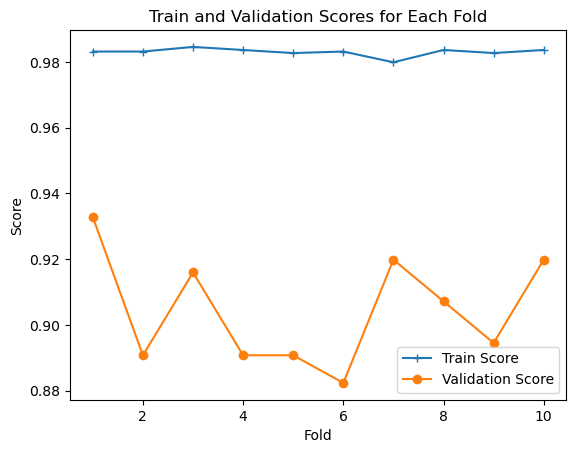

Average Accuracy Val K-Fold: 90.4471
Average Accuracy Train K-Fold: 98.3025
Average MCC Val K-Fold: 0.7850
Average MCC Train K-Fold: 0.9627
Average F1 Score Val K-Fold: 0.9009
Average F1 Score Train K-Fold: 0.9828
Average Precision Val K-Fold: 0.9042
Average Precision Train K-Fold: 0.9830
Average Recall Val K-Fold: 0.9045
Average Recall Train K-Fold: 0.9830
Accuracy Test: 90.91%
MCC Test: 0.7941
F1 Score Test: 0.9075
Precision Test: 0.9069
Recall Test: 0.9091
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        65
           1       1.00      0.88      0.93         8
           2       0.83      0.79      0.81        97
           3       0.94      0.96      0.95       424

    accuracy                           0.91       594
   macro avg       0.89      0.84      0.86       594
weighted avg       0.91      0.91      0.91       594

Confusion Matrix Test:
[[ 47   0   8  10]
 [  1   7   0   0]
 [  3   0  77  17

In [8]:
from Utility_model_training import evaluate_classifier_with_stratified_kfold, evaluate_classifier_with_kfold_smote, evaluate_classifier_with_stratified_smote
evaluate_classifier_with_stratified_smote(X_train, y_train, X_test, y_test, xgb, num_folds=10,save_path=path_smote_strat,model_name="xgb_classifier_smote_stratified")
evaluate_classifier_with_stratified_kfold(X_train, y_train, X_test, y_test, xgb, num_folds=10,save_path=path_strat,model_name="xgb_classifier_stratified")
evaluate_classifier_with_kfold_smote(X_train, y_train, X_test, y_test, xgb, num_folds=10,save_path=path_smote,model_name="xgb_classifier_smote")

KeyboardInterrupt: 

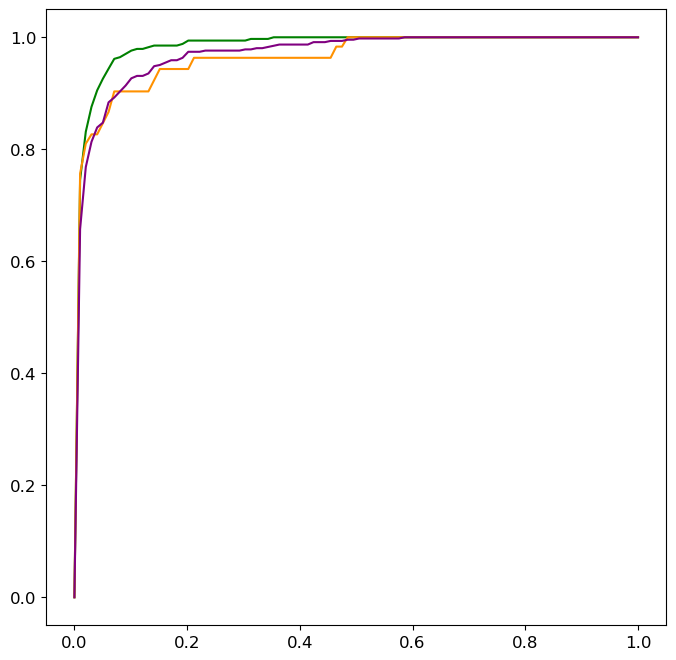

In [9]:
path_smote_strat_ROC = "/home/nalin21478/BTP/ML-food-Processing/ML in Food Processing/models_102/smote_strat/ROC_Curves"
path_strat_ROC = "/home/nalin21478/BTP/ML-food-Processing/ML in Food Processing/models_102/strat/ROC_Curves"
path_smote_ROC = "/home/nalin21478/BTP/ML-food-Processing/ML in Food Processing/models_102/smote/ROC_Curves"
from Utility_ROC_Curves import plot_roc_curves_multiclass_smote_strat,plot_roc_curves_multiclass_smote, plot_roc_curves_multiclass_strat
plot_roc_curves_multiclass_smote_strat(xgb, X, y, n_splits=10, save_folder=path_smote_strat_ROC, model_name="xg_KFold_SMOTE_strat")
plot_roc_curves_multiclass_strat(xgb, X, y, n_splits=10, save_folder=path_strat_ROC, model_name="xg_KFold_Strat")
plot_roc_curves_multiclass_smote(xgb, X, y, n_splits=10, save_folder=path_smote_ROC, model_name="xg_KFold_SMOTE")
